#### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


plt.style.use('fivethirtyeight')

In [ ]:
## Loading the data

ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root = ROOT_DIR,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True

)

test_data = datasets.MNIST(
    root = ROOT_DIR,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True

)

100%|██████████| 9912422/9912422 [00:00<00:00, 96037326.86it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 81408396.39it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29939960.68it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1084573.23it/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



#### **Upon executing this cell, We will observe the automatic creation of the MNIST folder in the root directory**

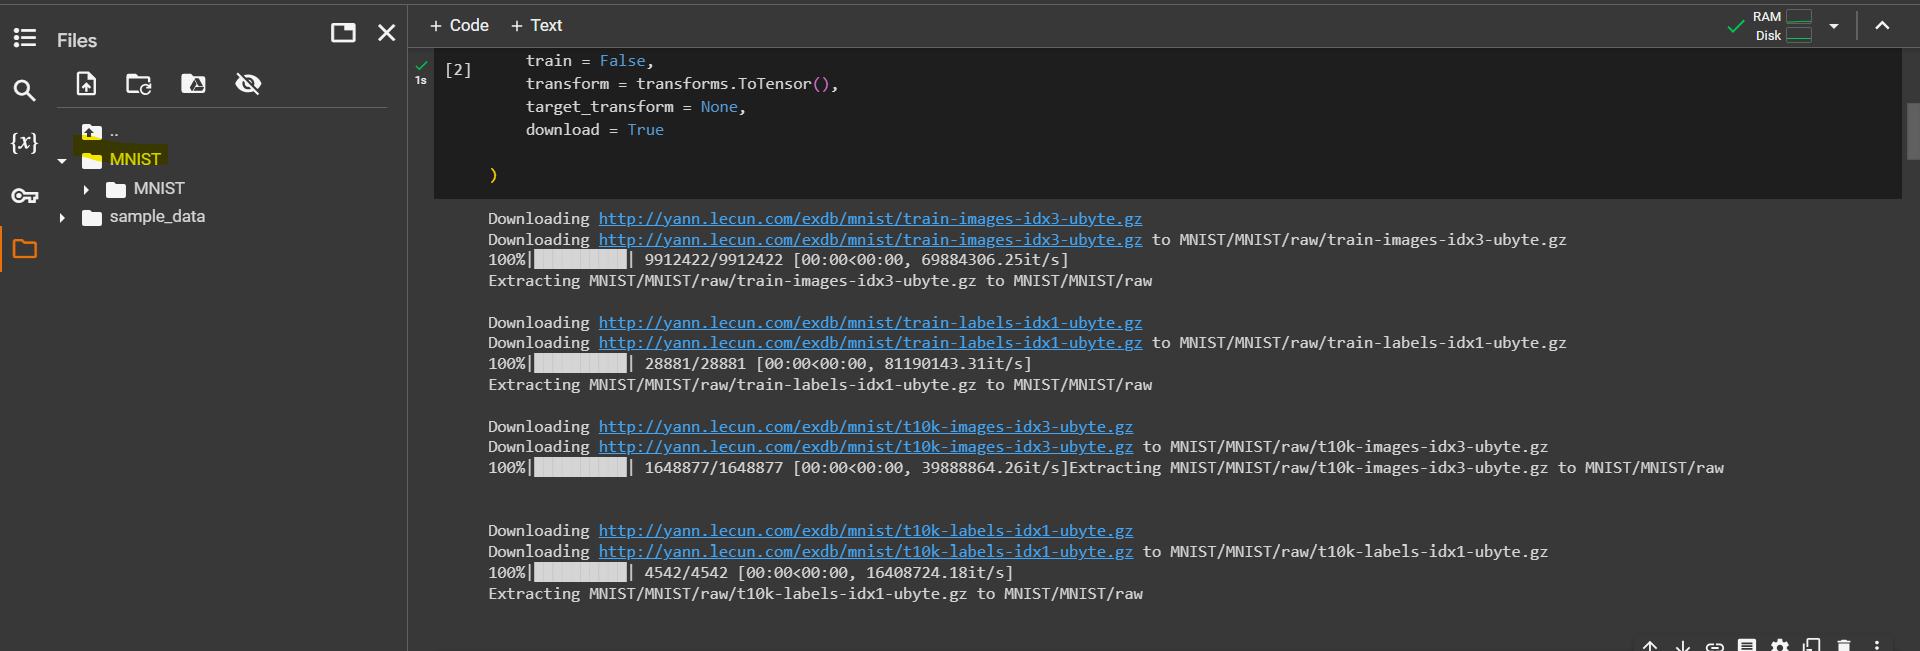

In [ ]:
train_data.data.dtype

torch.uint8

In [ ]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<Axes: >

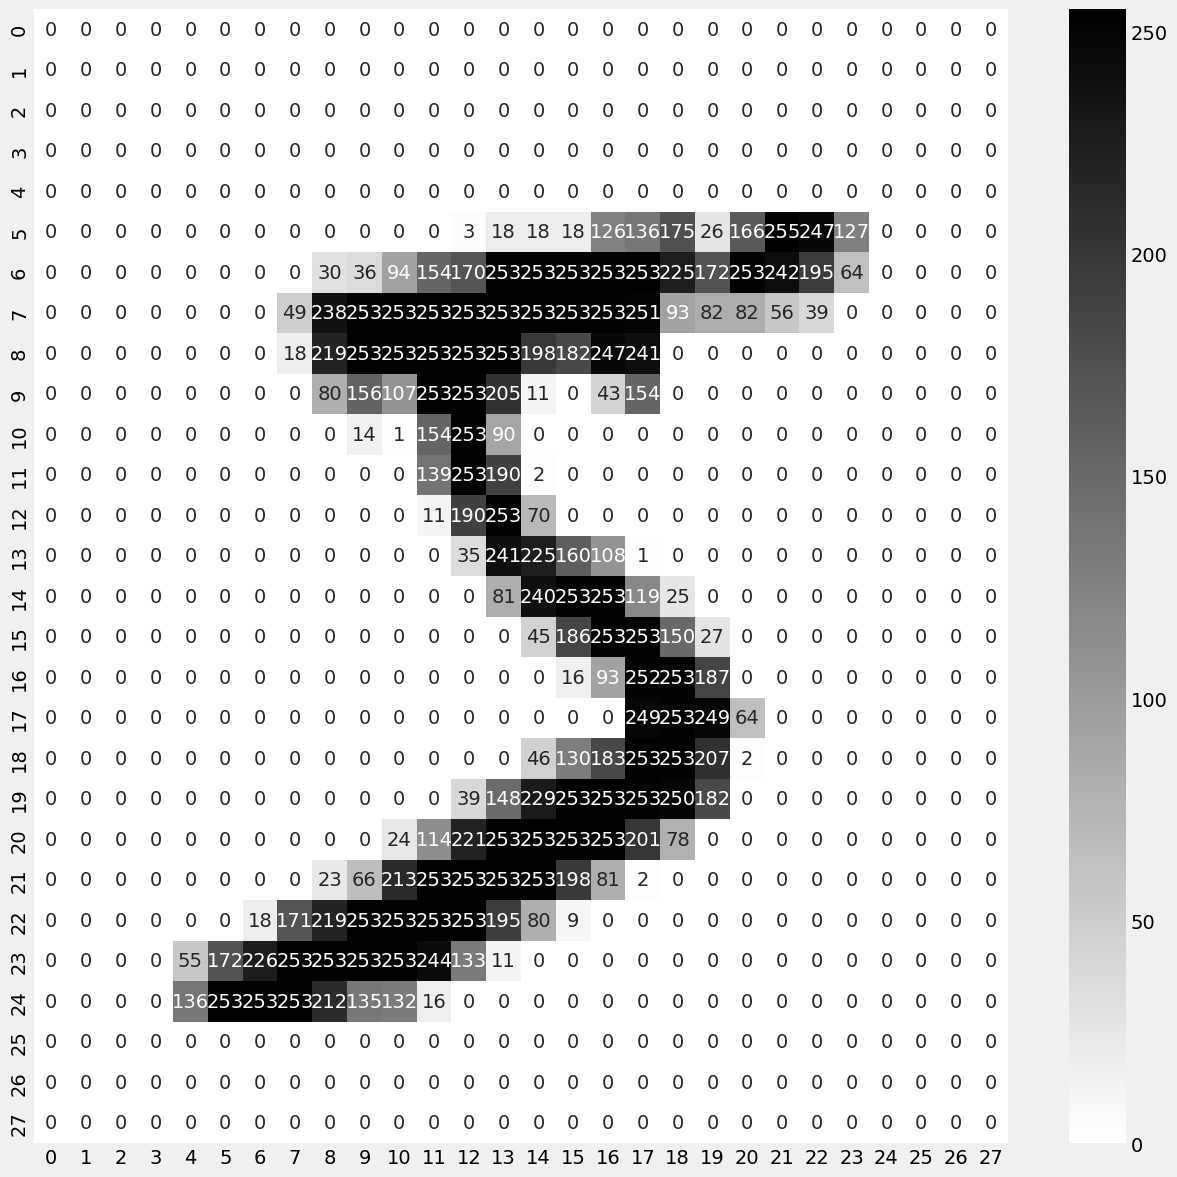

In [ ]:
# Visualising the Data
plt.figure(figsize=(14,14))
sns.heatmap(train_data.data[0], annot=True,cmap="binary", fmt='d')

In [ ]:
train_data.data[0].shape

torch.Size([28, 28])

In [ ]:
train_data.data[0].min().numpy(), train_data.data[0].max().numpy()

(array(0, dtype=uint8), array(255, dtype=uint8))

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_data.targets.dtype

torch.int64

In [ ]:
# Total Training Data
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
# Total Test Data
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
BATCH=128

train_data_loader = DataLoader(dataset=train_data,
                              batch_size=BATCH,
                              shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                             batch_size=BATCH)

In [ ]:
for x in test_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
# Checking the Devices
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

In [ ]:
# Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
model = NeuralNetwork(784, 10)

model.to(DEVICE)

model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x797772b38890>

In [ ]:
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        optimizer.zero_grad()

        y_pred = model(x.reshape(-1, 784))

        loss = CE_loss(y_pred, y)

        loss_.append(loss.item())
        loss.backward()
        optimizer.step()

        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)

        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 2.3039 Accuracy 0.0781
   Batch: 100, Loss: 0.2893 Accuracy 0.8984
   Batch: 200, Loss: 0.1638 Accuracy 0.9453
   Batch: 300, Loss: 0.4332 Accuracy 0.8984
   Batch: 400, Loss: 0.1253 Accuracy 0.9531
Epoch: 2/10
   Batch: 0, Loss: 0.1324 Accuracy 0.9688
   Batch: 100, Loss: 0.2399 Accuracy 0.9531
   Batch: 200, Loss: 0.1409 Accuracy 0.9609
   Batch: 300, Loss: 0.1148 Accuracy 0.9766
   Batch: 400, Loss: 0.0383 Accuracy 0.9922
Epoch: 3/10
   Batch: 0, Loss: 0.0583 Accuracy 0.9922
   Batch: 100, Loss: 0.0442 Accuracy 0.9922
   Batch: 200, Loss: 0.1267 Accuracy 0.9531
   Batch: 300, Loss: 0.0845 Accuracy 0.9766
   Batch: 400, Loss: 0.1206 Accuracy 0.9766
Epoch: 4/10
   Batch: 0, Loss: 0.0552 Accuracy 0.9922
   Batch: 100, Loss: 0.0704 Accuracy 0.9766
   Batch: 200, Loss: 0.0178 Accuracy 1.0000
   Batch: 300, Loss: 0.0643 Accuracy 0.9844
   Batch: 400, Loss: 0.0520 Accuracy 0.9766
Epoch: 5/10
   Batch: 0, Loss: 0.0494 Accuracy 0.9844
   Batch: 100, Loss: 0.014

<Axes: >

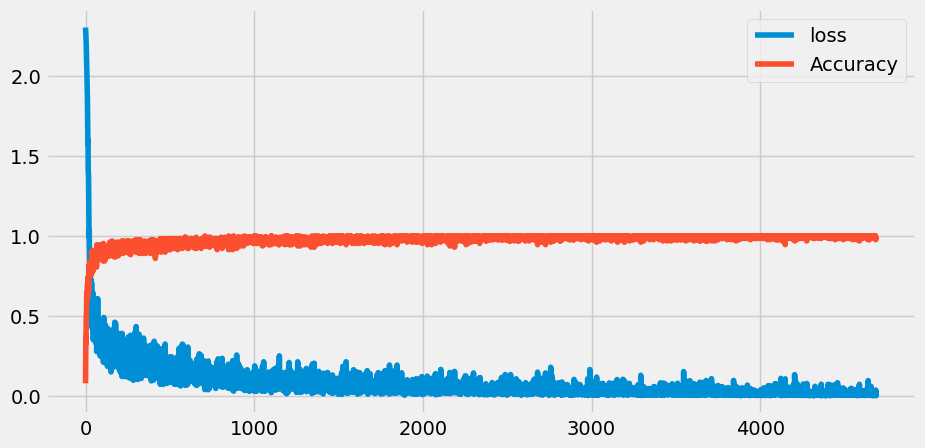

In [ ]:
# plot the Train acc and loss
# plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [ ]:
# testing over the test data

test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)

        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [ ]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0779, test accuracy: 0.9801


In [ ]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)

        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))

In [ ]:
cm = confusion_matrix(target, pred)

<Axes: >

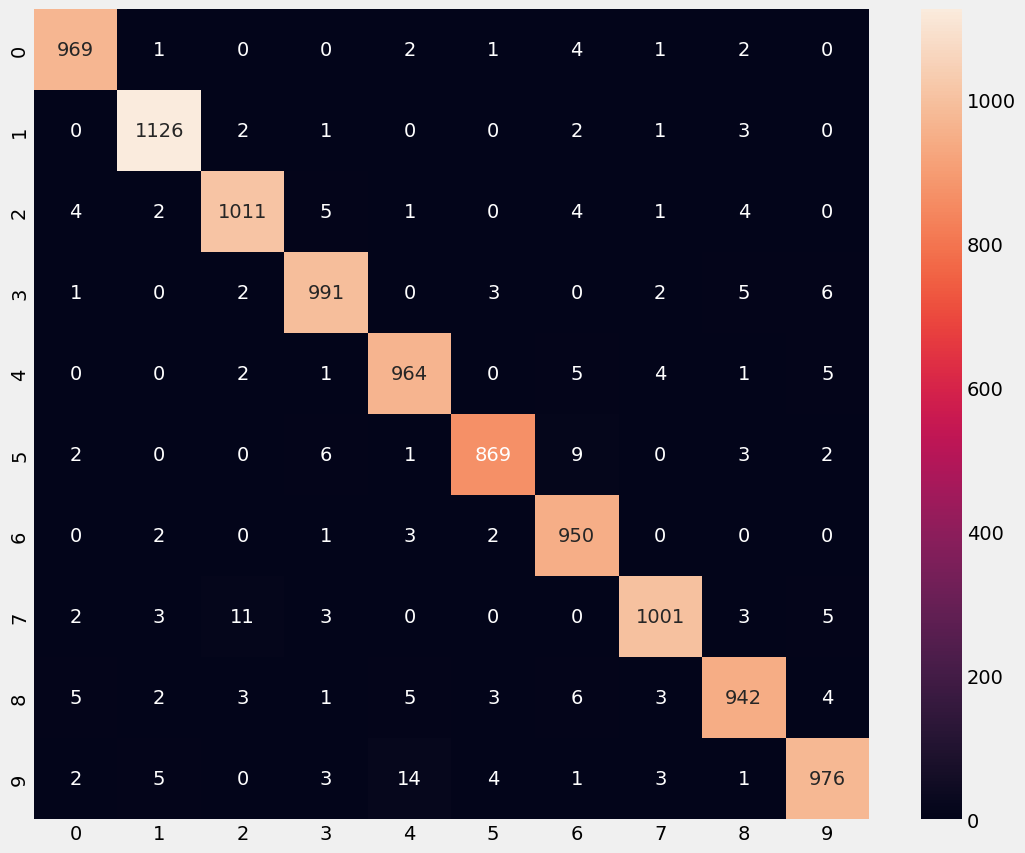

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')

### Saving the model

In [ ]:
torch.save(model.state_dict(), 'model_checkpoint.pth')

Model is Saved in the Root diretory

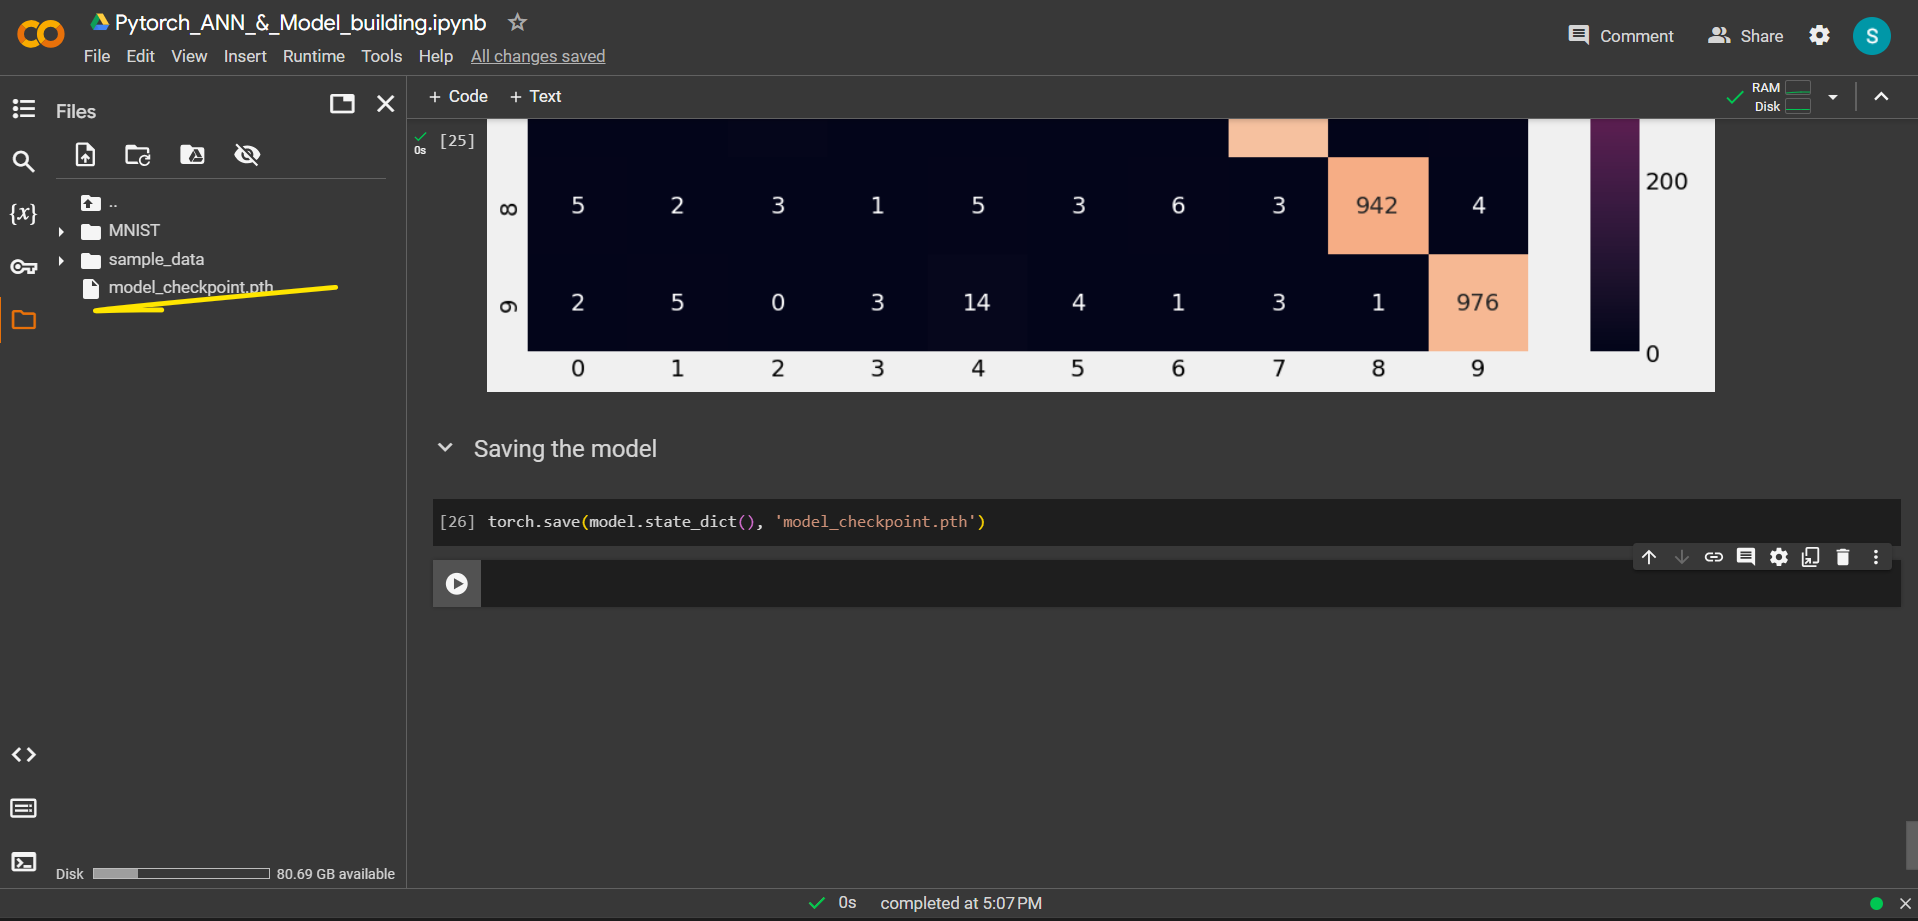

# What is a state_dict in PyTorch
In PyTorch, the learnable parameters (i.e. weights and biases) of a
``torch.nn.Module`` model are contained in the model’s parameters
(accessed with ``model.parameters()``). A ``state_dict`` is simply a
Python dictionary object that maps each layer to its parameter tensor.

## Introduction
A ``state_dict`` is an integral entity if you are interested in saving
or loading models from PyTorch.
Because ``state_dict`` objects are Python dictionaries, they can be
easily saved, updated, altered, and restored, adding a great deal of
modularity to PyTorch models and optimizers.
Note that only layers with learnable parameters (convolutional layers,
linear layers, etc.) and registered buffers (batchnorm’s running_mean)
have entries in the model’s ``state_dict``. Optimizer objects
(``torch.optim``) also have a ``state_dict``, which contains information
about the optimizer’s state, as well as the hyperparameters used.
In this recipe, we will see how ``state_dict`` is used with a simple
model.

We can Access the model  ``state_dict``

Now that we have constructed our model, we can understand
what is preserved in their respective ``state_dict`` properties.

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

print()

Model's state_dict:
layers.0.weight 	 torch.Size([256, 784])
layers.0.bias 	 torch.Size([256])
layers.2.weight 	 torch.Size([128, 256])
layers.2.bias 	 torch.Size([128])
layers.4.weight 	 torch.Size([10, 128])
layers.4.bias 	 torch.Size([10])



This information is relevant for saving and loading the model and
optimizers for future use.

Congratulations! You have successfully used ``state_dict`` in PyTorch.